In [3]:
%%capture
from tqdm import tqdm

from convokit import Corpus, download
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Load the corpus
corpus = Corpus(filename=download("conversations-gone-awry-cmv-corpus"))
corpus = Corpus(filename=download("conversations-gone-awry-corpus"))


Dataset already exists at /Users/mishkin/.convokit/saved-corpora/conversations-gone-awry-cmv-corpus
Dataset already exists at /Users/mishkin/.convokit/saved-corpora/conversations-gone-awry-corpus


In [4]:
kodis_corp = corpus_converter.test_corp

NameError: name 'corpus_converter' is not defined

Speakers: 9548
Conversations: 6842
Utterances: 42964


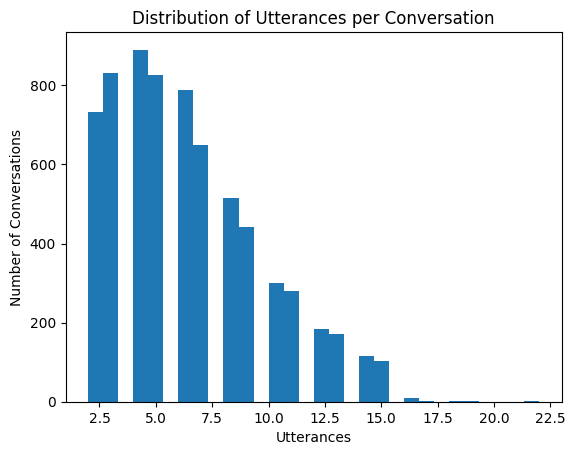

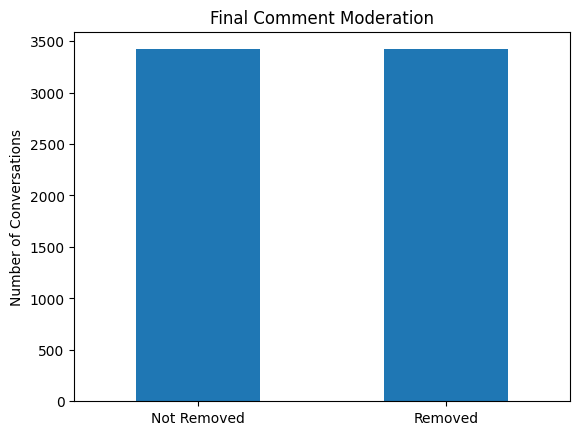

In [ ]:
# Basic stats
print("Speakers:", len(list(corpus.iter_speakers())))
print("Conversations:", len(list(corpus.iter_conversations())))
print("Utterances:", len(list(corpus.iter_utterances())))

# Utterances per conversation
utterance_counts = [len(list(c.iter_utterances())) for c in corpus.iter_conversations()]
plt.hist(utterance_counts, bins=30)
plt.title("Distribution of Utterances per Conversation")
plt.xlabel("Utterances")
plt.ylabel("Number of Conversations")
plt.show()


# Conversations with removed final comments
removed = [c.meta.get("has_removed_comment", False) for c in corpus.iter_conversations()]
pd.Series(removed).value_counts().plot(kind="bar")
plt.title("Final Comment Moderation")
plt.xticks([0, 1], ["Not Removed", "Removed"], rotation=0)
plt.ylabel("Number of Conversations")
plt.show()

In [ ]:
# Compute the number of utterances per conversation
conversation_lengths = [len(list(convo.iter_utterances())) for convo in corpus.iter_conversations()]

# Compute average, median, and max
average_length = np.mean(conversation_lengths)
median_length = np.median(conversation_lengths)
max_length = np.max(conversation_lengths)

# Sample a few conversation structures
sample_structures = {}
for i, convo in enumerate(corpus.iter_conversations()):
    if i >= 3: break  # Just look at 3 examples
    utt_structure = [(utt.id, utt.reply_to) for utt in convo.iter_utterances()]
    sample_structures[convo.id] = utt_structure

In [ ]:
display(average_length, median_length, max_length)

np.float64(6.279450453083894)

np.float64(6.0)

np.int64(22)

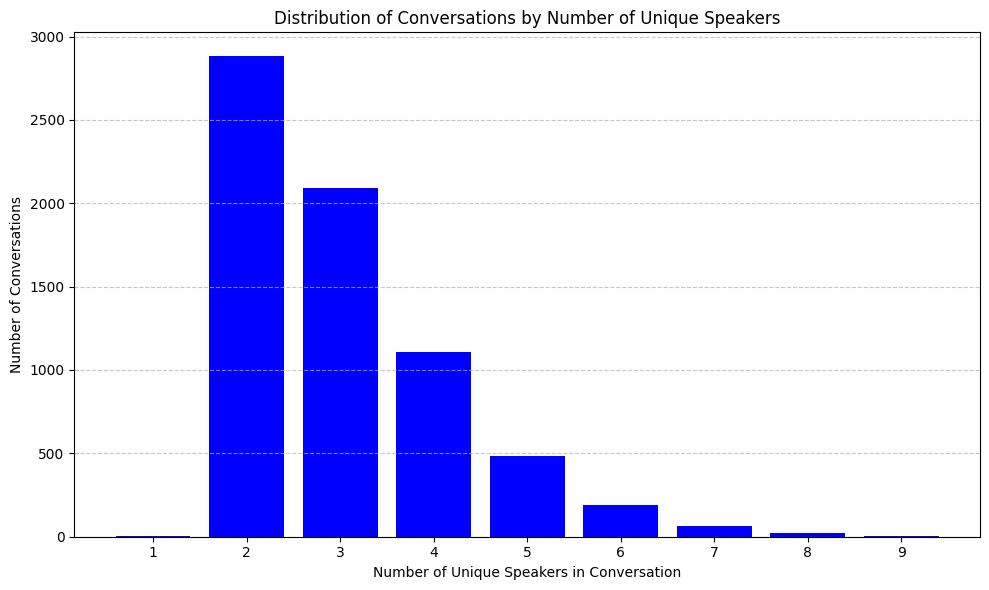

In [ ]:
# Count number of conversations by number of unique speakers
speaker_count_distribution = defaultdict(int)


for convo in corpus.iter_conversations():
    speaker_ids = {utt.speaker.id for utt in convo.iter_utterances()}
    speaker_count_distribution[len(speaker_ids)] += 1

# Sort for plotting
sorted_counts = dict(sorted(speaker_count_distribution.items()))

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(sorted_counts.keys(), sorted_counts.values(), color="blue")
plt.xlabel("Number of Unique Speakers in Conversation")
plt.ylabel("Number of Conversations")
plt.title("Distribution of Conversations by Number of Unique Speakers")
plt.xticks(list(sorted_counts.keys()))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


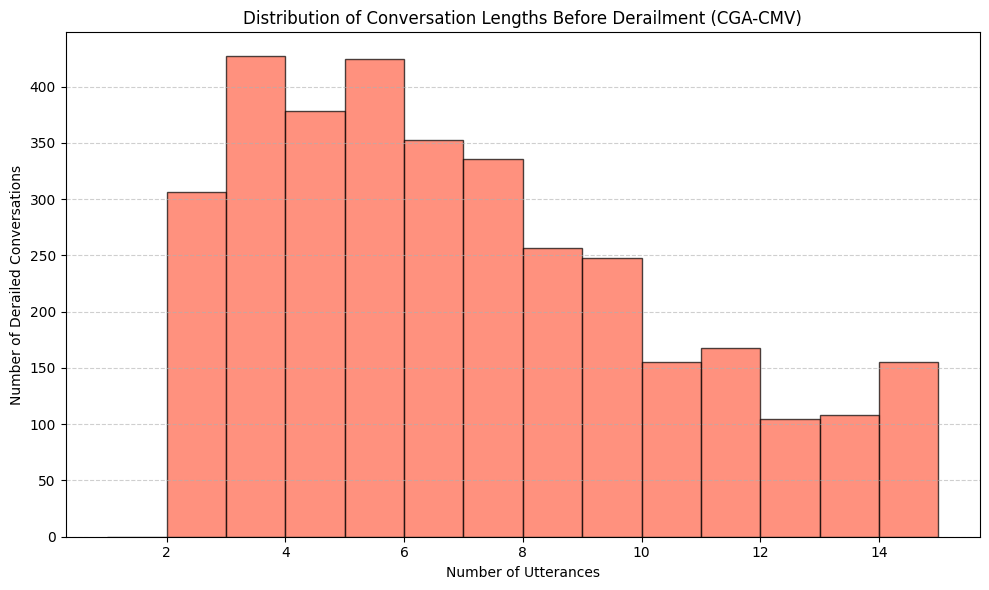

np.float64(6.60479391990646)

In [ ]:
import numpy as np
# List to store lengths of derailed conversations
derailed_lengths = []

for convo in corpus.iter_conversations():
    if convo.meta.get("has_removed_comment") == True:
        num_utts = len(list(convo.iter_utterances()))
        derailed_lengths.append(num_utts)

# Compute average length before derailment
average_derailment_length = np.mean(derailed_lengths)

# Plot histogram of lengths
plt.figure(figsize=(10, 6))
plt.hist(derailed_lengths, bins=range(1, max(derailed_lengths)+1), color="tomato", edgecolor="black", alpha=0.7)
plt.title("Distribution of Conversation Lengths Before Derailment (CGA-CMV)")
plt.xlabel("Number of Utterances")
plt.ylabel("Number of Derailed Conversations")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

average_derailment_length


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict
from convokit import Corpus, download



# Group all corpora
corpora = {
    "CGA-CMV": cmv_corpus,
    "CGA-WIKI": wiki_corpus,
    "Test Corpus": test_corp
}

fig, axs = plt.subplots(len(corpora), 4, figsize=(20, 12))
fig.suptitle("Conversational Characteristics Across Corpora", fontsize=16)

for i, (label, corpus) in enumerate(corpora.items()):
    # --- Plot 1: Distribution of Utterances per Conversation ---
    utterance_counts = [len(list(c.iter_utterances())) for c in corpus.iter_conversations()]
    axs[i, 0].hist(utterance_counts, bins=30, color="skyblue", edgecolor="black")
    axs[i, 0].set_title(f"{label}\nUtterances per Conversation")
    axs[i, 0].set_xlabel("Utterances")
    axs[i, 0].set_ylabel("Conversations")

    # --- Plot 2: Final Comment Moderation ---
    removed = [c.meta.get("has_removed_comment", False) for c in corpus.iter_conversations()]
    pd.Series(removed).value_counts().sort_index().plot(kind="bar", ax=axs[i, 1], color=["gray", "red"])
    axs[i, 1].set_title(f"{label}\nFinal Comment Moderation")
    axs[i, 1].set_xticks([0, 1])
    axs[i, 1].set_xticklabels(["Not Removed", "Removed"])
    axs[i, 1].set_ylabel("Conversations")

    # --- Plot 3: Unique Speakers per Conversation ---
    speaker_count_distribution = defaultdict(int)
    for convo in corpus.iter_conversations():
        speaker_ids = {utt.speaker.id for utt in convo.iter_utterances()}
        speaker_count_distribution[len(speaker_ids)] += 1
    sorted_counts = dict(sorted(speaker_count_distribution.items()))
    axs[i, 2].bar(sorted_counts.keys(), sorted_counts.values(), color="blue")
    axs[i, 2].set_title(f"{label}\nSpeakers per Conversation")
    axs[i, 2].set_xlabel("Unique Speakers")
    axs[i, 2].set_ylabel("Conversations")

    # --- Plot 4: Lengths of Derailed Conversations ---
    derailed_lengths = [
        len(list(convo.iter_utterances()))
        for convo in corpus.iter_conversations()
        if convo.meta.get("has_removed_comment") == True
    ]
    axs[i, 3].hist(
        derailed_lengths,
        bins=range(1, max(derailed_lengths) + 1 if derailed_lengths else 2),
        color="tomato",
        edgecolor="black"
    )
    axs[i, 3].set_title(f"{label}\nLength Before Derailment")
    axs[i, 3].set_xlabel("Utterances")
    axs[i, 3].set_ylabel("Derailed Conversations")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


NameError: name 'cmv_corpus' is not defined